In [44]:
import seaborn as sb
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


# Read the CSV File
df = pd.read_csv('iris.csv')
df.head()      

,caseno,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [45]:

X=df.iloc[:,1:3]
y = df[['Species']]
y.Species.replace({'setosa':0, 'virginica':1,'versicolor':2}, inplace=True)



C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


0.7333333333333333


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


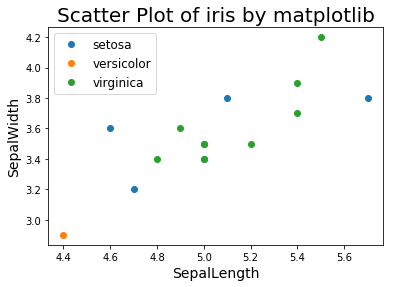

In [46]:

# print(type(X), type(y))
# train/test 데이터 분리

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=0) 



# 지도학습 모델 중 k-nn모델
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)    # 분류기 모델에 학습 데이터와 label 데이터 적용
y_pred = knn.predict(X_test)    # 분류기 모델의 결과 예측
# print(X_test)
# print(y_pred)
print(metrics.accuracy_score(y_test, y_pred))
kr_y=pd.DataFrame(y_pred, columns=["Species"])
knn_result= pd.merge(pd.DataFrame(X_test),kr_y, left_index=True, right_index=True)
knn_result.Species.replace({0:'setosa', 1:'virginica',2:'versicolor'}, inplace=True)
# print(knn_result) 

groups = knn_result.groupby('Species')



fig, ax = plt.subplots()

for name, group in groups:

    ax.plot(group.SepalLength, 

            group.SepalWidth, 

            marker='o', 

            linestyle='',

            label=name)

ax.legend(fontsize=12, loc='upper left') # legend position

plt.title('Scatter Plot of iris by matplotlib', fontsize=20)

plt.xlabel('SepalLength', fontsize=14)

plt.ylabel('SepalWidth', fontsize=14)

plt.show()





[0.6666666666666666, 0.6444444444444445, 0.7333333333333333, 0.7111111111111111, 0.7333333333333333, 0.6888888888888889, 0.7555555555555555, 0.7555555555555555, 0.7333333333333333, 0.7333333333333333, 0.7111111111111111, 0.7333333333333333, 0.7555555555555555, 0.7555555555555555, 0.7777777777777778, 0.7555555555555555, 0.7555555555555555, 0.7555555555555555, 0.7555555555555555, 0.7555555555555555, 0.8, 0.7555555555555555, 0.7555555555555555, 0.7777777777777778, 0.7333333333333333]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. 

Text(0, 0.5, 'Testing Accuracy')

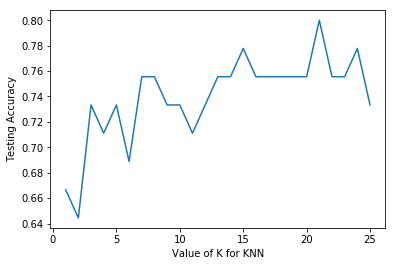

In [47]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

# plot the relationship between K and testing accuracy

plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')